*__IPCA: Income Evaluation__*

In [1]:
%matplotlib inline

In [2]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [3]:
from common import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import IncrementalPCA as IPCA
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(0)

In [5]:
import warnings; warnings.simplefilter('ignore')

In [6]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset(path_to_file="../Data/dataset2/train.csv")

In [7]:
y_test[y_test<=1] = 0
y_test[y_test>=2] = 1
y_train[y_train<=1] = 0
y_train[y_train>=2] = 1

In [15]:
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [8]:
for i in range(2, 9):
    ipca = IPCA(n_components=i)
    ipca.fit_transform(x_train.values)
    x_new = ipca.fit_transform(x_train.values)
    print(f"Dimension={i}, Sum: {sum(ipca.explained_variance_ratio_)}")

Dimension=2, Sum: 0.8303146260308647
Dimension=3, Sum: 0.9424727953693871
Dimension=4, Sum: 0.9990406289712637
Dimension=5, Sum: 0.9997392865924261
Dimension=6, Sum: 0.9999261109806589
Dimension=7, Sum: 0.9999530333370297
Dimension=8, Sum: 0.9999698584208857


In [9]:
# After chosing the best component
best_component = 9
ipca = IPCA(n_components=best_component)
xn = ipca.fit_transform(x_train)
for i in range(1, best_component):
    x_train[f"ipca-{i}"] = xn[:, i]

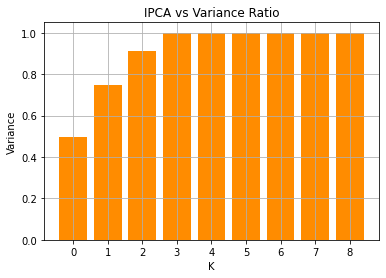

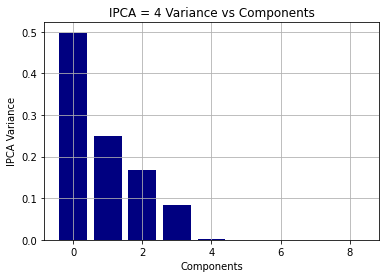

In [11]:
sums_ipca = []
for i in range(1, 10):
    ipca = IPCA(n_components=i)
    ipca.fit_transform(x_train)
    sums_ipca.append(sum(ipca.explained_variance_ratio_))

ipca2 = IPCA(n_components=4)
ipca2.fit_transform(x_train)

plt.figure()
plt.title(f"IPCA vs Variance Ratio")
plt.bar(range(len(sums_ipca)), sums_ipca, color="darkorange")
plt.xticks(range(len(sums_ipca)))
plt.xlabel("K")
plt.ylabel("Variance")
plt.grid()
plt.show()

plt.figure()
plt.title(f"IPCA = 4 Variance vs Components")
plt.bar(range(len(ipca.explained_variance_ratio_)), ipca.explained_variance_ratio_, color='navy')
plt.xlabel("Components")
plt.ylabel("IPCA Variance")
plt.grid()
plt.show()

In [13]:
np.array(y_train['price_range']).reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [27]:
# Iterate over components and see which one results in least KMeans error
ipca_score = []
for i in range(1, 10):
    ipca = IPCA(n_components=i)
    xtr = ipca.fit_transform(x_train)  
    kmm = KMeans(n_clusters=2, max_iter=100, n_jobs=-1).fit(xtr)
    ipca_score.append(accuracy_score(kmm.labels_, y_train))
# Same - even here the minimum number of components  = 5

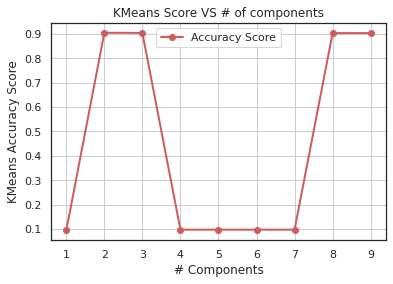

In [28]:
plt.figure()
plt.title("KMeans Score VS # of components")
plt.plot(range(1, 10), ipca_score, 'o-', lw=2, color='indianred', label="Accuracy Score")
plt.xlabel("# Components")
plt.ylabel("KMeans Accuracy Score")
plt.legend()
plt.xticks(range(1, 10))
plt.legend(loc='best')
plt.grid()

In [19]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,ipca-1,ipca-2,ipca-3,ipca-4,ipca-5,ipca-6,ipca-7,ipca-8
1520,1883,0,1.6,0,9,0,24,0.1,87,1,...,0,0,-532.318228,665.971988,82.692024,-51.898422,-9.655685,7.081919,-10.434709,3.808002
64,702,0,2.6,1,2,1,9,0.7,141,3,...,0,0,90.013009,-546.824082,305.487377,2.372703,-23.170137,-6.959243,9.313839,-0.565513
1431,1283,1,0.7,1,0,1,27,0.2,80,4,...,0,0,815.454050,7.625746,122.921208,-60.473969,-6.299320,-5.408751,-7.158665,7.888996
926,1496,1,1.9,1,13,0,38,0.1,126,4,...,0,1,-634.343202,298.775314,-423.108584,-12.443499,5.048857,8.158006,-6.097772,0.343048
983,1175,1,1.3,0,2,0,19,0.3,164,7,...,1,0,241.514038,-68.159449,-64.728021,25.102069,-12.092015,-2.078742,-0.924790,-3.738532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1396,1,0.6,0,0,0,37,0.7,134,4,...,0,1,-119.809003,164.872505,6.097338,-5.221377,4.825408,2.559995,7.089451,3.750757
1818,837,0,2.4,1,1,0,51,0.2,104,5,...,0,1,360.992500,-421.242749,405.252112,-35.095707,20.061382,3.809874,8.414817,4.283199
724,696,0,0.5,0,6,0,51,0.3,197,3,...,0,1,-276.155661,-522.337301,-265.858596,57.915611,19.105834,-0.598582,-2.675901,5.099172
1160,1159,0,2.7,0,13,1,28,0.2,80,8,...,1,1,-559.794706,-49.208982,-172.885879,-58.245107,-6.212058,11.582217,-0.968009,-6.699307


<AxesSubplot:xlabel='ipca-1', ylabel='ipca-2'>

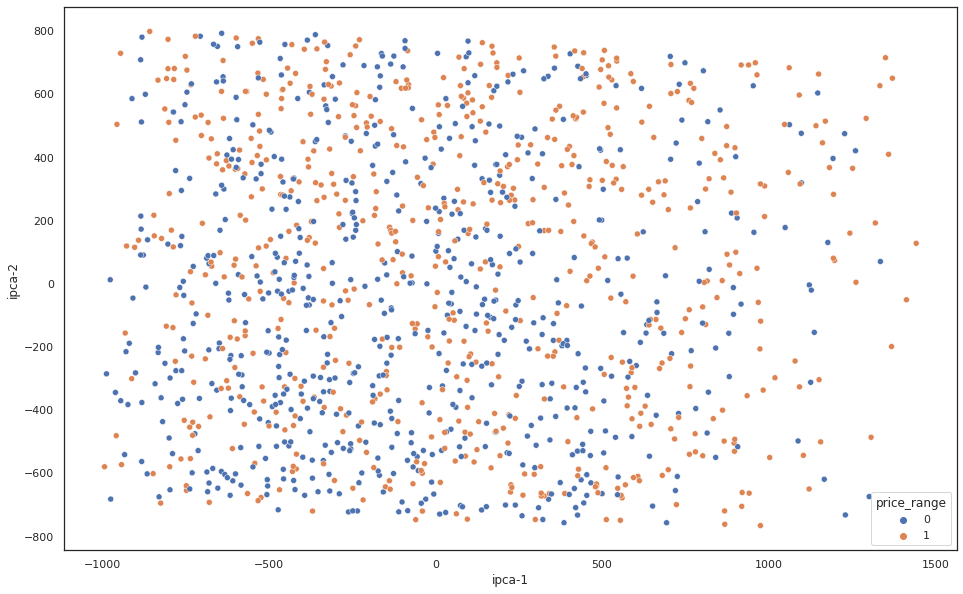

In [30]:
x_train['price_range'] = y_train['price_range']
plt.figure(figsize=(16,10))
sns.set_theme(style="white")
sns.scatterplot(
    x="ipca-1", y="ipca-2",
    hue="price_range",
    data=x_train,
    legend="full",
    alpha=1
)

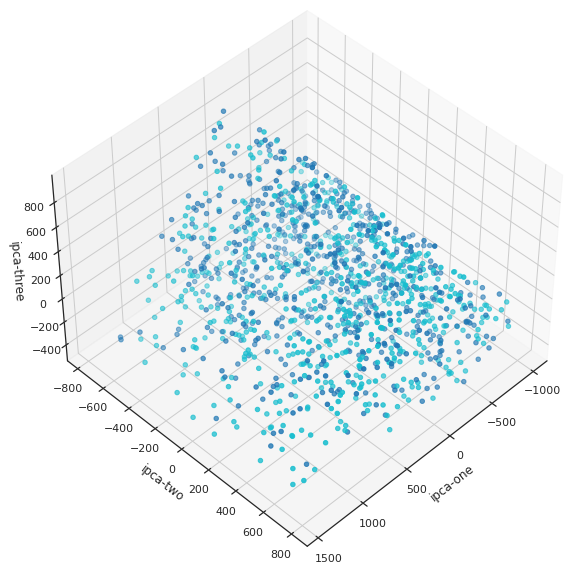

In [32]:
rndperm = np.random.permutation(x_train.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["ipca-1"], 
    ys=x_train["ipca-2"], 
    zs=x_train["ipca-3"], 
    c=x_train["price_range"], 
    cmap='tab10'
)
ax.set_xlabel('ipca-one')
ax.set_ylabel('ipca-two')
ax.set_zlabel('ipca-three')
ax.view_init(45, 45)
plt.show()

### KMeans 

In [33]:
s = {}
h = {}

for i in range(2, 10):
    print(f"cluster: {i}")
    kmeans = KMeans(n_clusters=i, n_init=50, max_iter=1000, n_jobs=-1).fit(xn)
    label = kmeans.labels_
    s[i] = silhouette_score(xn, label, metric='euclidean')
    h[i] = homogeneity_score(y_train['price_range'].values, label)
    print(s[i])
    print(h[i])
    print("\n")


cluster: 2
0.3998494999736261
0.5461979794181078


cluster: 3
0.27128573477269396
0.6064218717898706


cluster: 4
0.24230113084185578
0.6260407635059144


cluster: 5
0.2349790261029304
0.6339360162434982


cluster: 6
0.22453524453013732
0.6392500487666777


cluster: 7
0.22430561675105987
0.6302038673703274


cluster: 8
0.22221302941897186
0.6299228285889044


cluster: 9
0.21939259167342887
0.7505723361839459




In [34]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

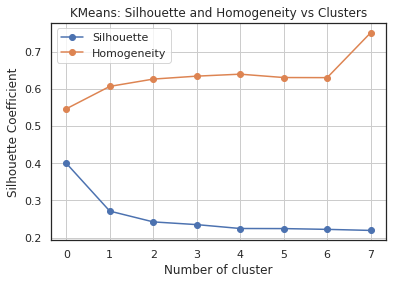

In [36]:
plt.figure()
plt.title("KMeans: Silhouette and Homogeneity vs Clusters")
plt.plot(sdf, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.legend(sdf.columns)
plt.show()

### Gaussian Mixture to implement Expectation Maximization

In [43]:
s_em = {}
h_em = {}
l_em = {}
aic_em = {}
bic_em = {}
for i in range(2, 20, 2):
    clf_gm = GaussianMixture(n_components=i, n_init=50, max_iter=100, random_state=0).fit(xn)
    labels = clf_gm.predict(xn)
    print(labels)
    s_em[i] = silhouette_score(xn, labels, metric="euclidean")
    h_em[i] = homogeneity_score(y_train['price_range'].values, labels)
    l_em[i] = clf_gm.score(xn)
    aic_em[i] = clf_gm.aic(xn)
    bic_em[i] = clf_gm.bic(xn)

[1 1 1 ... 1 1 1]
[2 1 0 ... 2 2 3]
[4 3 5 ... 4 4 5]
[2 0 5 ... 4 7 5]
[5 6 1 ... 9 9 6]
[11  9 11 ...  8  8  9]
[ 7  4 13 ...  3 12 13]
[10  6  8 ...  1  9  1]
[14  8  4 ...  2 10  4]


In [44]:
gm_df = pd.DataFrame(list(s_em.values()), columns=['Silhouette'])
gm_df['Homogeneity'] = pd.DataFrame(list(h_em.values()))
gm_df['Likelihood'] = pd.DataFrame(list(l_em.values()))
gm_df['aic'] = pd.DataFrame(list(aic_em.values()))
gm_df['bic'] = pd.DataFrame(list(bic_em.values()))

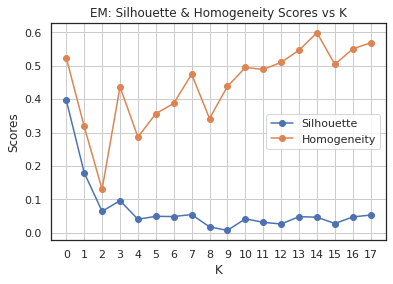

In [40]:
plt.figure()
plt.title('EM: Silhouette & Homogeneity Scores vs K')
plt.plot(gm_df[['Silhouette', 'Homogeneity']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

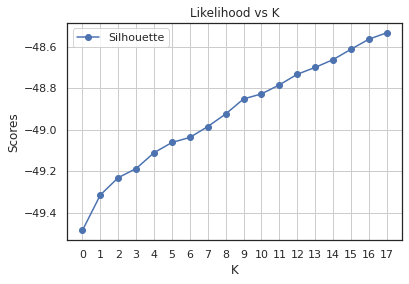

In [41]:
plt.figure()
plt.title('Likelihood vs K')
plt.plot(gm_df[['Likelihood']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [ ]:
plt.figure()
plt.title('Likelihood vs K')
plt.plot(gm_df[['Likelihood']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [63]:
# # Obtain centroids via KMeans
# clf_k = KMeans(n_clusters=2, n_init=50, max_iter=1000,random_state=0, n_jobs=-1).fit(x_train)
# df_x_train = pd.DataFrame(clf_k.labels_, columns=['labels'])
xtr

array([[ 1.45033374e+03, -7.52811689e+02,  9.41826596e+02, ...,
         1.00084819e+01, -1.47516111e+01,  5.41464633e+00],
       [ 8.36977758e+02,  1.27297589e+02, -7.73326028e+02, ...,
        -9.84131308e+00,  1.31726505e+01, -8.25786946e-01],
       [ 1.83554078e+03,  1.15322609e+03,  1.07843319e+01, ...,
        -7.64939964e+00, -1.00895833e+01,  1.11752918e+01],
       ...,
       [ 5.12688275e+02, -3.90543175e+02, -7.38696571e+02, ...,
        -8.50784911e-01, -3.77989310e+00,  7.22167777e+00],
       [ 3.80404391e+02, -7.91669245e+02, -6.95919521e+01, ...,
         1.63774430e+01, -1.40156016e+00, -9.46811126e+00],
       [ 1.33877466e+03, -5.06214257e+02, -2.09447236e+02, ...,
         1.07695348e+01, -1.50000786e+01,  5.98393861e+00]])

In [66]:
# KMeans
clf_mlp = MLPClassifier()
start_time = time.time()
clf_mp = clf_mlp.fit(xtr, y_train)
y_pred = clf_mlp.predict(xtr)
print(f"Accuracy Score: {accuracy_score(y_pred, y_train)}")
print(classification_report(y_train, y_train))
print(time.time() - start_time)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      1.00      1.00       660

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320

0.7758891582489014


In [51]:
y_pred.shape

(1320,)

In [52]:
y_test.shape

(330, 1)

In [54]:
xtr.shape

(1320, 9)

In [55]:
y_train.shape

(1320, 1)

In [56]:
x_test.shape

(330, 20)

In [57]:
y_test.shape

(330, 1)